<a href="https://colab.research.google.com/github/victorsa42/Analise_de_dados_com_Python-/blob/main/Analise_batimentos_com_pendulos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

links para entender melhor:
* https://www.youtube.com/watch?v=t1d0gZ99G_Y
* https://www.youtube.com/watch?v=tnhjAziFT-Q
* https://matplotlib.org/stable/gallery/index.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
from matplotlib.figure import Figure
from sklearn.metrics import r2_score
from scipy import stats



In [ ]:
# importar modulos
import matplotlib.pyplot as plt  #modulo grafico
import numpy as np  #modulo matematico
import pandas as pd #modulo para analise de dados
from scipy.optimize import curve_fit #biblioteca cientifica responsavel por fitar uma  curva 


In [ ]:

# importar google drive e autenticação
#from google.colab import drive,auth 
#drive.mount('/content/gdrive', force_remount = True )

# importar google planilhas (sheet)
from google.colab import auth
auth.authenticate_user()
import gspread  # modulo do google sheet
from oauth2client.client import GoogleCredentials  #credenciais do google

## autenticação do modulo gspread
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# abrir o arquivo do sheet pelo nome
wb = gc.open('dados_exp4')
wb

### abrir pelo link
# wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1y8Yl6hQ9dwVGj_ouwqjKYWyssjSNir0b2EFQCVLHxh0/edit#gid=0')

sheet1 = wb.worksheet('Sheet5')
#sheet1.get_all_values()  ###pega todos os valores 
dados = sheet1.get_all_records()  ###pega todos os valores sendo a primeira linha o titulo

df = pd.DataFrame(dados)
df

,t1,x1,,t2,x2
0,0.100067,-0.185967,0.2302,0.116744,0.358118
1,0.116744,-0.186052,0.128118,0.133422,0.352529
2,0.133422,-0.186209,,0.150100,0.346611
3,0.150100,-0.186813,,0.166778,0.340496
4,0.166778,-0.187518,,0.183456,0.333426
...,...,...,...,...,...
396,6.704467,-0.238682,,6.721144,0.161992
397,6.721144,-0.236728,,6.737822,0.168616
398,6.737822,-0.234805,,6.754500,0.175783
399,6.754500,-0.233350,,6.771178,0.183308


In [ ]:
# equção a ser usada no ajuste da curva
def func(x, A1, A2, w1, w2, d1, d2):
    return  A1*np.cos(w1*x + d1) + A2*np.cos(w2*x + d2) 

def func2(x2, A3, A4, w3, w4, d3, d4):
    return  -A3*np.cos(w3*x2 + d3) + A4*np.cos(w4*x2 + d4)



In [ ]:
#x = np.array([1, 2, 2.5, 6, 7.8, 9.6])
# x= np.linspace(1,7,50)



[ 0.05392837 -0.08810898  4.25961245  3.38066439 -9.04155717  3.37037931]
[0.00064406 0.0006348  0.00809226 0.00505058 0.02828454 0.01719419]
[ 0.04696799 -0.08496127  4.37274807  3.37207378 -9.49087318  3.4008776 ]
[0.00088552 0.00087406 0.01501549 0.00843934 0.05441317 0.02942831]


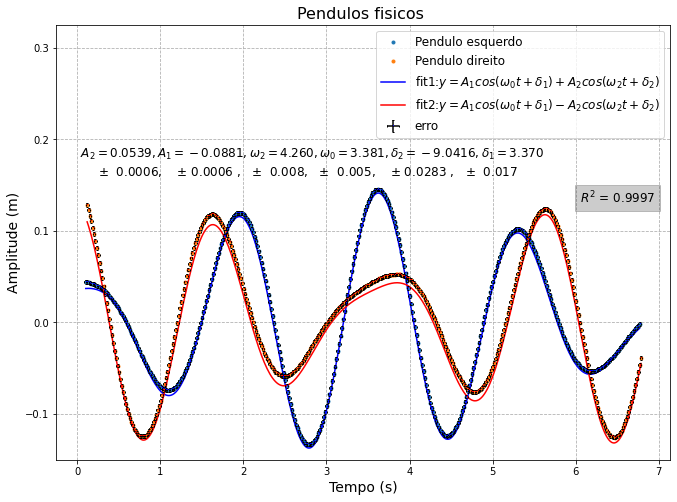

In [ ]:
#criar uma figura que sera o grafico
fig, ax = plt.subplots(figsize =(11,8))
nomefig = 'Grafico4comIN.png'


#valores dos eixos referentes as colunas da tabela 
x = np.array(df['t1'])
y = np.array(df['x1'])+0.23

x2 = np.array(df['t2'])
y2 = np.array(df['x2'])-0.23

#xr=np.array(df['erro Vm1C(mm/s)'])
xr=0.017
yr=0.002


#ajuste
popt, pcov = curve_fit(func, x , y, p0=(0.01, 0.13, 3.4, 1, 1 ,1))   #p0=(0.11276, 1) p0=(0.0001, 0.13, 3.4, 1)
erroV = np.sqrt(np.diag(pcov)) #erro das variaveis obtidas pelo ajuste 
print(popt)
print(erroV)

popt2, pcov2 = curve_fit(func2, x2 , y2, p0=(0.1, -0.008,   4.26, 3.39, -9.04,  3.37))
erroV2 = np.sqrt(np.diag(pcov2))
print(popt2)
print(erroV2)




# plotar o grafico
plt.plot(x ,y , marker = '.', label="Pendulo esquerdo", ls = '', lw = '1')
plt.plot(x2 ,y2 , marker = '.', label="Pendulo direito", ls = '', lw = '1')


# plot do ajuste
plt.plot(x, func(x, *popt), 'b-', label='fit1:$ y=A_1cos(\\omega_0 t+\\delta_1) + A_2cos(\\omega_2 t+\\delta_2)$')
plt.plot(x2, func2(x2, *popt2), 'r-', label='fit2:$ y=A_1cos(\\omega_0 t+\\delta_1) - A_2cos(\\omega_2 t+\\delta_2)$')
 
#barra de erro
ax.errorbar(x,y, xerr=xr, yerr=yr, fmt=",", color="b", label='erro', capsize=1 ,ecolor='k') 
ax.errorbar(x2,y2, xerr=xr, yerr=yr, fmt=",", color="r", capsize=1 ,ecolor='k')

#configurações do grafico
ax.set_title('Pendulos fisicos ', fontsize = 16) #titulo
ax.set_xlabel('Tempo (s)' , fontsize = 14 ) #nome do eixo x
ax.set_ylabel('Amplitude (m)' , fontsize = 14 ) #nome do eixo y
ax.grid(ls= '--') #grid no grafico
ax.legend(loc="best",fontsize = 12,fancybox=True) #legenda do grafico
plt.ylim((-0.15,0.325))


#calculo e texto do R^2
modelPredictions = func(x, *popt) 
absError = modelPredictions - y
r_squared = 1.0 - (np.var(absError) / np.var(y))


ax.text(0 ,0.18 , r' $A_2=%2.4f, A_1= %2.4f, \omega_2= %2.3f,  \omega_0=%2.3f, \delta_2= %2.4f, \delta_1= %2.3f $' % tuple(popt), fontsize=12,) #caixa de texto
ax.text(0.25, 0.16, r'$\pm $  %0.4f,    $\pm $ %0.4f ,   $\pm $  %0.3f,   $\pm $  %0.3f,    $\pm $ %0.4f ,   $\pm $  %0.3f'  % tuple(erroV), fontsize=12,) #caixa de texto
ax.text(6.05, 0.13, r'$R^2$ = %0.4f' % r_squared, fontsize=12, bbox={'facecolor': 'black', 'alpha': 0.2, 'pad': 5}) #caixa de texto

#ax.text(1.7 ,0.18 , r' $A_2=%2.5f,  \omega_2= %2.4f,  \delta_2= %2.3f $' % tuple(popt2), fontsize=12,)
#ax.text(1.88, 0.13, r'$\pm $  %0.4f,      $\pm $ %0.4f ,    $\pm $  %0.3f'  % tuple(erroV2), fontsize=12,) 

## salvar figura
fig.savefig(nomefig)
plt.show()

# Nova seção